In [9]:
# %matplotlib inline

In [650]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.io import imread, imread_collection, imshow, imshow_collection
from skimage.filters import threshold_otsu
from skimage.transform import resize, rotate

from scipy.signal import convolve2d
from scipy.fft import fft2, fftshift

In [67]:
cat_image = imread("/Users/miroslavamalkovska/Documents/AI/Data_Science/04/data/domestic-cat/dc (17).jpg")

In [69]:
cat_image.shape

(183, 275, 3)

In [71]:
cat_image[:, :, 0]

array([[ 64,  59,  51, ...,  39,  39,  39],
       [ 58,  55,  49, ...,  39,  39,  39],
       [ 50,  49,  46, ...,  37,  37,  37],
       ...,
       [118, 117, 124, ..., 164, 178, 190],
       [131, 125, 125, ..., 172, 186, 199],
       [139, 132, 129, ..., 177, 191, 203]], dtype=uint8)

In [73]:
imread_collection("/Users/miroslavamalkovska/Documents/AI/Data_Science/04/data/domestic-cat/*")

In [562]:
all_domestic_cats_collection = imread_collection("/Users/miroslavamalkovska/Documents/AI/Data_Science/04/data/domestic-cat/*")

In [53]:
#next(all_domestic_cats)

In [564]:
domestic_cats = list(all_domestic_cats_collection)

In [79]:
len(domestic_cats)

183

In [81]:
domestic_cats[0] # 1-во изображение

array([[185, 188, 193],
       [183, 186, 191],
       [179, 182, 187],
       [177, 180, 185],
       [176, 179, 184],
       [177, 180, 185],
       [179, 182, 187],
       [181, 184, 189],
       [190, 193, 198],
       [193, 196, 201],
       [196, 199, 204],
       [199, 202, 207],
       [200, 203, 208],
       [198, 201, 206],
       [196, 199, 204],
       [195, 198, 203],
       [202, 201, 207],
       [201, 200, 206],
       [201, 200, 206],
       [200, 199, 205],
       [199, 198, 204],
       [198, 197, 203],
       [198, 197, 203],
       [197, 196, 202],
       [198, 197, 203],
       [198, 197, 203],
       [198, 197, 203],
       [198, 197, 203],
       [198, 197, 203],
       [198, 197, 203],
       [198, 197, 203],
       [198, 197, 203],
       [204, 207, 216],
       [203, 206, 215],
       [204, 204, 214],
       [203, 203, 213],
       [201, 201, 209],
       [200, 200, 208],
       [200, 199, 207],
       [199, 198, 206],
       [201, 200, 206],
       [200, 199

In [83]:
domestic_cats[16] # 17-то

array([[182, 182, 192],
       [184, 184, 194],
       [187, 187, 197],
       [190, 190, 200],
       [191, 189, 200],
       [190, 188, 199],
       [187, 186, 194],
       [185, 184, 192],
       [188, 185, 194],
       [187, 184, 191],
       [185, 182, 189],
       [185, 180, 187],
       [182, 177, 184],
       [180, 175, 181],
       [178, 173, 179],
       [177, 172, 178],
       [177, 175, 189],
       [180, 178, 192],
       [184, 182, 196],
       [188, 186, 200],
       [189, 188, 202],
       [189, 188, 202],
       [185, 187, 200],
       [184, 186, 199],
       [188, 192, 204],
       [188, 192, 204],
       [186, 192, 204],
       [186, 192, 204],
       [186, 192, 204],
       [185, 193, 204],
       [185, 193, 204],
       [185, 193, 204],
       [203, 200, 219],
       [203, 200, 219],
       [202, 199, 218],
       [202, 198, 215],
       [201, 197, 214],
       [201, 194, 210],
       [200, 194, 208],
       [201, 193, 206],
       [188, 180, 193],
       [191, 181

In [566]:
(domestic_cats[16] == cat_image).all()

True

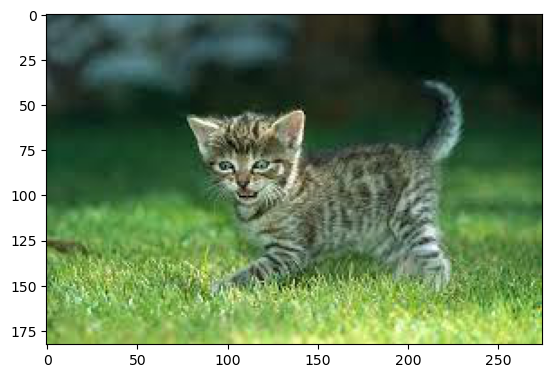

In [97]:
plt.imshow(cat_image)

In [99]:
imshow

<function skimage.io._io.imshow(arr, plugin=None, **plugin_args)>

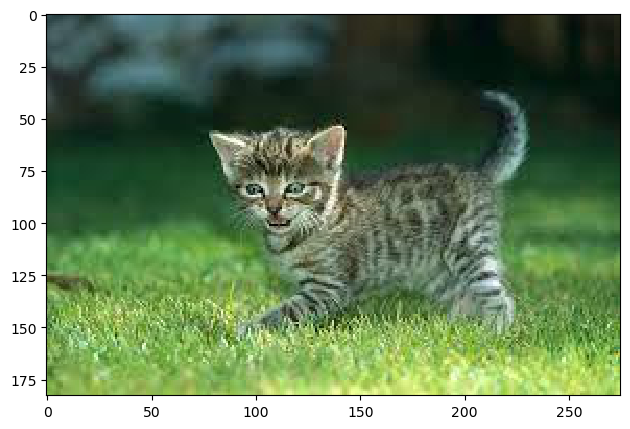

In [101]:
imshow(cat_image)

In [107]:
cat_image[:, :, 0].shape # очаква изображение с 2 измерения - h and w, няма канали

(183, 275)

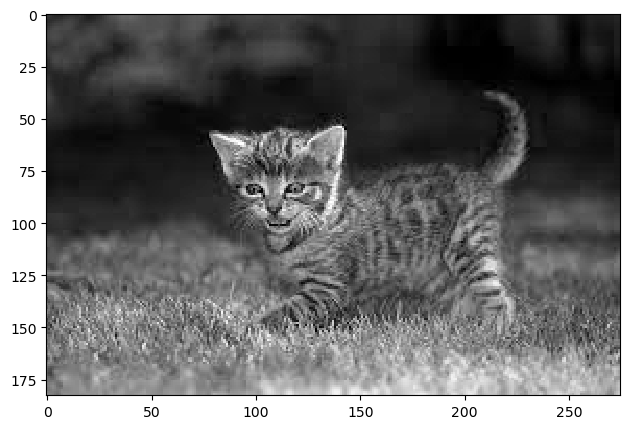

In [103]:
imshow(cat_image[:, :, 0]) # червен канал

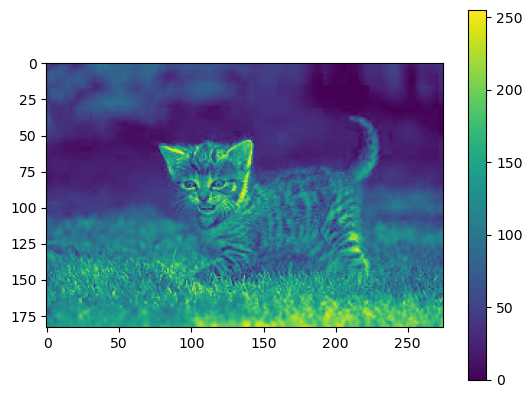

In [109]:
plt.imshow(cat_image[:, :, 0]) # очаква heatmap (хистограма)
plt.colorbar()

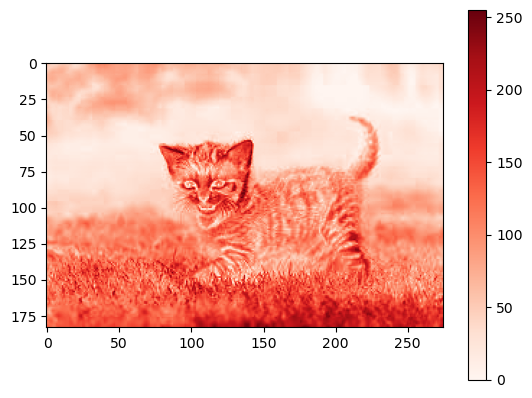

In [111]:
plt.imshow(cat_image[:, :, 0], cmap = "Reds")
plt.colorbar()

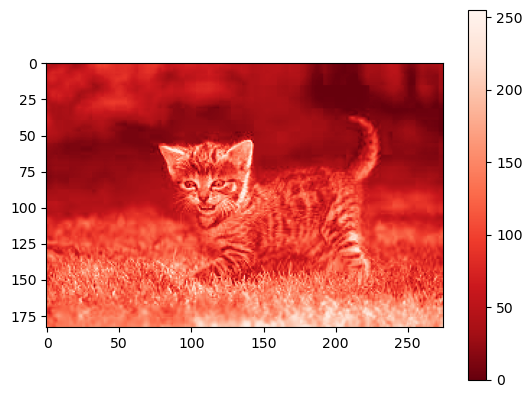

In [115]:
plt.imshow(cat_image[:, :, 0], cmap = "Reds_r") # reds reversed
plt.colorbar()
plt.show()

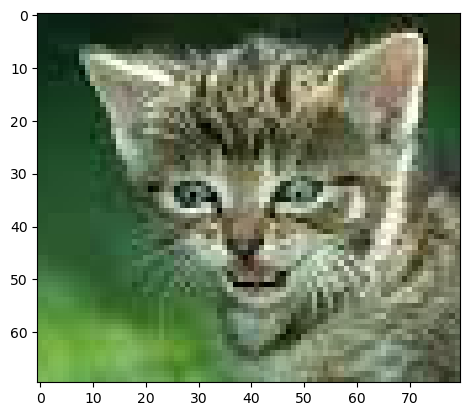

In [121]:
plt.imshow(cat_image[50:120, 70:150, :])

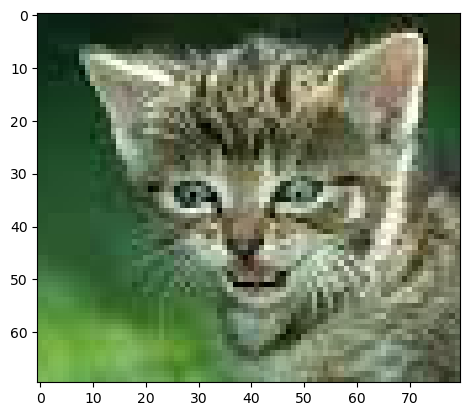

In [123]:
plt.imshow(cat_image[50:120, 70:150]) # може и без канали

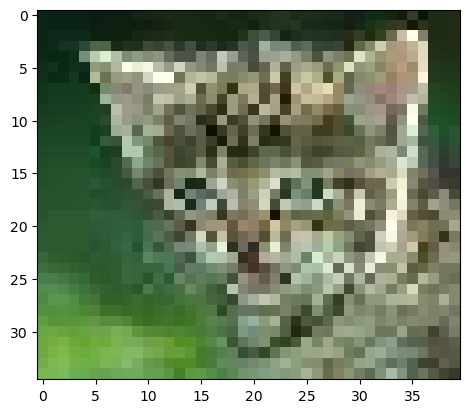

In [125]:
plt.imshow(cat_image[50:120:2, 70:150:2]) # през 2 - 4 пъти по-малко

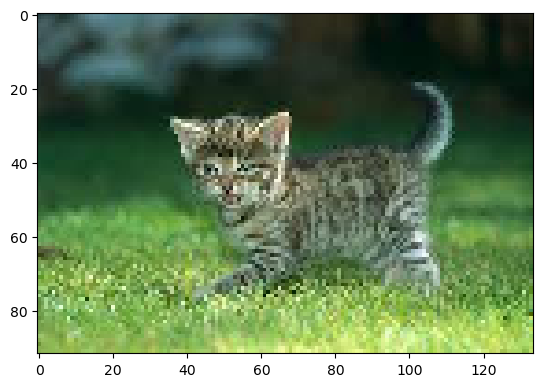

In [127]:
plt.imshow(cat_image[::2, 7::2]) # за всички 4 пъти по-малко изображение

In [131]:
cat_image.dtype

dtype('uint8')

In [133]:
cat_image.astype(float) # по-удобен за трансформации

array([[[ 64.,  88.,  90.],
        [ 59.,  83.,  85.],
        [ 51.,  75.,  77.],
        ...,
        [ 39.,  41.,  27.],
        [ 39.,  41.,  27.],
        [ 39.,  41.,  27.]],

       [[ 58.,  82.,  84.],
        [ 55.,  79.,  81.],
        [ 49.,  73.,  75.],
        ...,
        [ 39.,  41.,  27.],
        [ 39.,  41.,  27.],
        [ 39.,  41.,  27.]],

       [[ 50.,  74.,  76.],
        [ 49.,  73.,  75.],
        [ 46.,  70.,  72.],
        ...,
        [ 37.,  39.,  25.],
        [ 37.,  39.,  25.],
        [ 37.,  39.,  25.]],

       ...,

       [[118., 169.,  64.],
        [117., 168.,  65.],
        [124., 172.,  70.],
        ...,
        [164., 201.,  85.],
        [178., 215.,  99.],
        [190., 227., 111.]],

       [[131., 182.,  77.],
        [125., 176.,  73.],
        [125., 173.,  71.],
        ...,
        [172., 207.,  91.],
        [186., 221., 105.],
        [199., 234., 118.]],

       [[139., 190.,  85.],
        [132., 183.,  80.],
        [129., 1

In [135]:
cat_image.astype(float).dtype

dtype('float64')

In [137]:
cat_image + 100

array([[[164, 188, 190],
        [159, 183, 185],
        [151, 175, 177],
        ...,
        [139, 141, 127],
        [139, 141, 127],
        [139, 141, 127]],

       [[158, 182, 184],
        [155, 179, 181],
        [149, 173, 175],
        ...,
        [139, 141, 127],
        [139, 141, 127],
        [139, 141, 127]],

       [[150, 174, 176],
        [149, 173, 175],
        [146, 170, 172],
        ...,
        [137, 139, 125],
        [137, 139, 125],
        [137, 139, 125]],

       ...,

       [[218,  13, 164],
        [217,  12, 165],
        [224,  16, 170],
        ...,
        [  8,  45, 185],
        [ 22,  59, 199],
        [ 34,  71, 211]],

       [[231,  26, 177],
        [225,  20, 173],
        [225,  17, 171],
        ...,
        [ 16,  51, 191],
        [ 30,  65, 205],
        [ 43,  78, 218]],

       [[239,  34, 185],
        [232,  27, 180],
        [229,  21, 175],
        ...,
        [ 21,  54, 195],
        [ 35,  68, 209],
        [ 47,  80, 221]]

In [139]:
cat_image + 500 # става uint16

array([[[564, 588, 590],
        [559, 583, 585],
        [551, 575, 577],
        ...,
        [539, 541, 527],
        [539, 541, 527],
        [539, 541, 527]],

       [[558, 582, 584],
        [555, 579, 581],
        [549, 573, 575],
        ...,
        [539, 541, 527],
        [539, 541, 527],
        [539, 541, 527]],

       [[550, 574, 576],
        [549, 573, 575],
        [546, 570, 572],
        ...,
        [537, 539, 525],
        [537, 539, 525],
        [537, 539, 525]],

       ...,

       [[618, 669, 564],
        [617, 668, 565],
        [624, 672, 570],
        ...,
        [664, 701, 585],
        [678, 715, 599],
        [690, 727, 611]],

       [[631, 682, 577],
        [625, 676, 573],
        [625, 673, 571],
        ...,
        [672, 707, 591],
        [686, 721, 605],
        [699, 734, 618]],

       [[639, 690, 585],
        [632, 683, 580],
        [629, 677, 575],
        ...,
        [677, 710, 595],
        [691, 724, 609],
        [703, 736, 621]]

In [141]:
(cat_image + 500).astype("uint8")

array([[[ 52,  76,  78],
        [ 47,  71,  73],
        [ 39,  63,  65],
        ...,
        [ 27,  29,  15],
        [ 27,  29,  15],
        [ 27,  29,  15]],

       [[ 46,  70,  72],
        [ 43,  67,  69],
        [ 37,  61,  63],
        ...,
        [ 27,  29,  15],
        [ 27,  29,  15],
        [ 27,  29,  15]],

       [[ 38,  62,  64],
        [ 37,  61,  63],
        [ 34,  58,  60],
        ...,
        [ 25,  27,  13],
        [ 25,  27,  13],
        [ 25,  27,  13]],

       ...,

       [[106, 157,  52],
        [105, 156,  53],
        [112, 160,  58],
        ...,
        [152, 189,  73],
        [166, 203,  87],
        [178, 215,  99]],

       [[119, 170,  65],
        [113, 164,  61],
        [113, 161,  59],
        ...,
        [160, 195,  79],
        [174, 209,  93],
        [187, 222, 106]],

       [[127, 178,  73],
        [120, 171,  68],
        [117, 165,  63],
        ...,
        [165, 198,  83],
        [179, 212,  97],
        [191, 224, 109]]

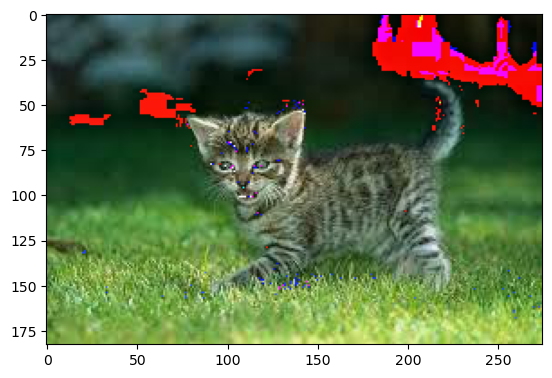

In [143]:
plt.imshow((cat_image + 500).astype("uint8"))

In [145]:
plt.imshow((cat_image + 200).astype("uint8"))

In [151]:
imshow((cat_image[:, :, 0] + 200).astype("uint8"))

In [153]:
(cat_image[:, :, 0] + 200).astype("uint8")

array([[  8,   3, 251, ..., 239, 239, 239],
       [  2, 255, 249, ..., 239, 239, 239],
       [250, 249, 246, ..., 237, 237, 237],
       ...,
       [ 62,  61,  68, ..., 108, 122, 134],
       [ 75,  69,  69, ..., 116, 130, 143],
       [ 83,  76,  73, ..., 121, 135, 147]], dtype=uint8)

In [159]:
(cat_image[:, :, 0] + 200) % 256

array([[  8,   3, 251, ..., 239, 239, 239],
       [  2, 255, 249, ..., 239, 239, 239],
       [250, 249, 246, ..., 237, 237, 237],
       ...,
       [ 62,  61,  68, ..., 108, 122, 134],
       [ 75,  69,  69, ..., 116, 130, 143],
       [ 83,  76,  73, ..., 121, 135, 147]], dtype=int16)

/opt/anaconda3/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


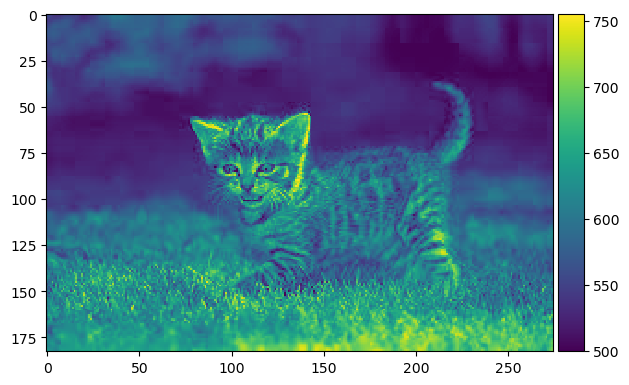

In [161]:
imshow(cat_image[:, :, 0] + 500)

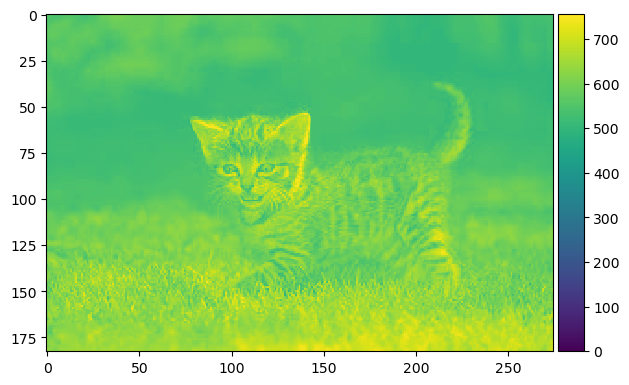

In [163]:
imshow(cat_image[:, :, 0] + 500, vmin = 0, vmax = 500+256)

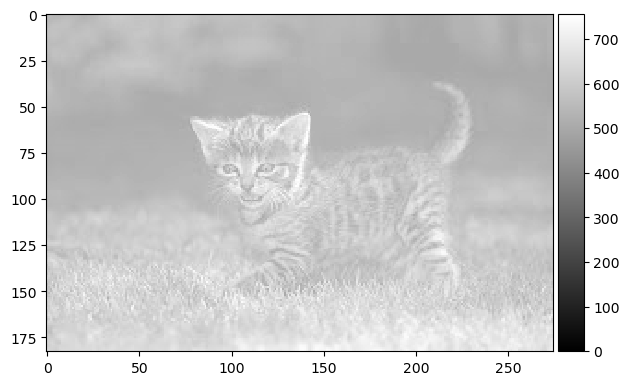

In [167]:
imshow(cat_image[:, :, 0] + 500, vmin = 0, vmax = 500+256, cmap = "gray")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


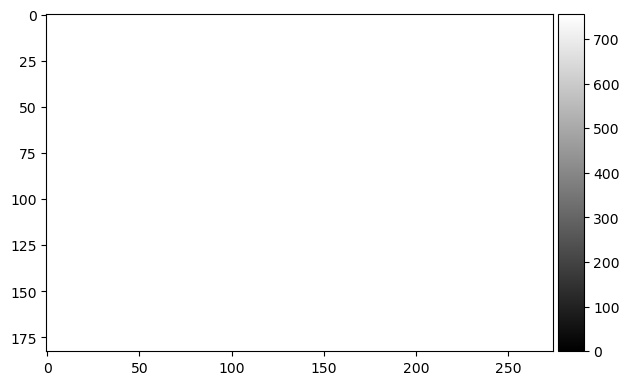

In [169]:
imshow(cat_image + 500, vmin = 0, vmax = 500+256, cmap = "gray")

In [171]:
imshow(cat_image[:, :, 0] + 500, vmin = 500, vmax = 500+256, cmap = "gray")

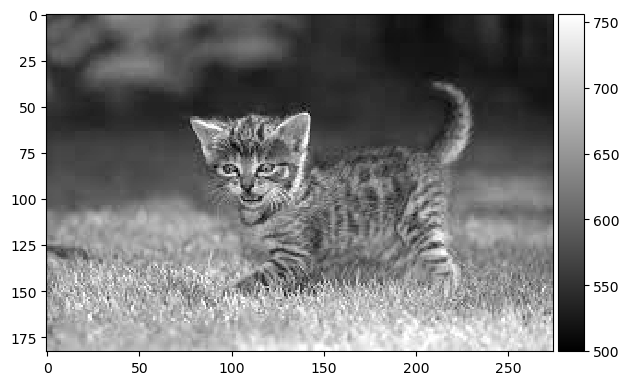

In [173]:
imshow(cat_image[:, :, 1] + 500, vmin = 500, vmax = 500+256, cmap = "gray") # 1 - зелен канал, 0-червен

In [177]:
imshow(cat_image[:, :, 0] - 500, cmap = "gray")

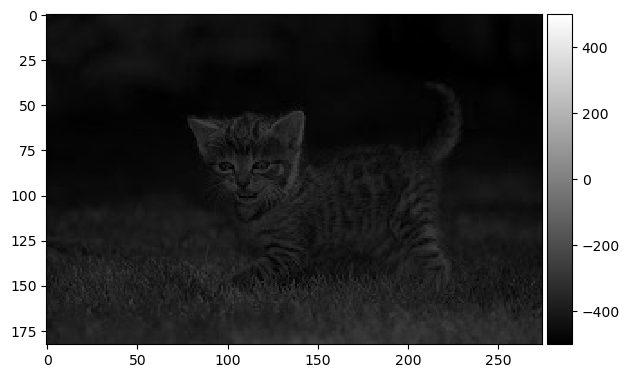

In [179]:
imshow(cat_image[:, :, 0].astype(int) - 500, cmap = "gray")

In [181]:
cat_image[:, :, 0].astype(int) - 500

array([[-436, -441, -449, ..., -461, -461, -461],
       [-442, -445, -451, ..., -461, -461, -461],
       [-450, -451, -454, ..., -463, -463, -463],
       ...,
       [-382, -383, -376, ..., -336, -322, -310],
       [-369, -375, -375, ..., -328, -314, -301],
       [-361, -368, -371, ..., -323, -309, -297]])

In [183]:
cat_image[:, :, 0].astype(float) - 500

array([[-436., -441., -449., ..., -461., -461., -461.],
       [-442., -445., -451., ..., -461., -461., -461.],
       [-450., -451., -454., ..., -463., -463., -463.],
       ...,
       [-382., -383., -376., ..., -336., -322., -310.],
       [-369., -375., -375., ..., -328., -314., -301.],
       [-361., -368., -371., ..., -323., -309., -297.]])

(array([[32., 41., 44., ...,  0.,  0.,  0.],
        [32., 43., 42., ...,  0.,  0.,  0.],
        [32., 44., 43., ...,  0.,  0.,  0.],
        ...,
        [59., 33., 28., ...,  5.,  0.,  0.],
        [59., 33., 31., ...,  9.,  1.,  0.],
        [59., 32., 30., ...,  9.,  0.,  0.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 275 BarContainer objects>)

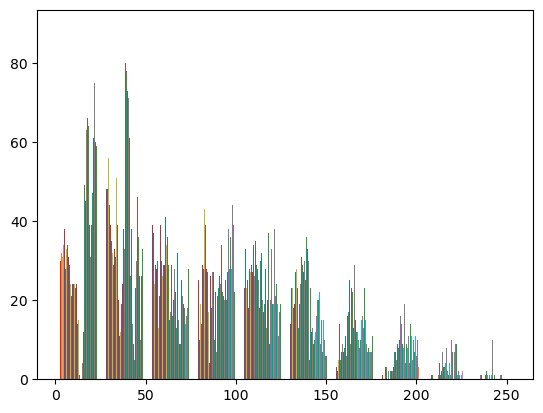

In [187]:
plt.hist(cat_image[:, :, 0]) # на червения канал
# тъй като е многомерен масив прави бр хистограми, колкото са колоните, 275 хистограми на 275 реда
# тр да бъде едномерен

In [193]:
cat_image[:, :, 0].ravel().shape

(50325,)

In [197]:
cat_image.shape[:2]

(183, 275)

In [199]:
183 * 275

50325

In [203]:
cat_image[:, :, 0].reshape(-1, 1) # 1 колкона, на колкото дойдат редове

array([[ 64],
       [ 59],
       [ 51],
       ...,
       [177],
       [191],
       [203]], dtype=uint8)

In [205]:
cat_image[:, :, 0].reshape(-1, 1).shape

(50325, 1)

In [218]:
red_channel_for_histogram = cat_image[:, :, 0].ravel()
green_channel_for_histogram = cat_image[:, :, 1].ravel()
blue_channel_for_histogram = cat_image[:, :, 2].ravel()

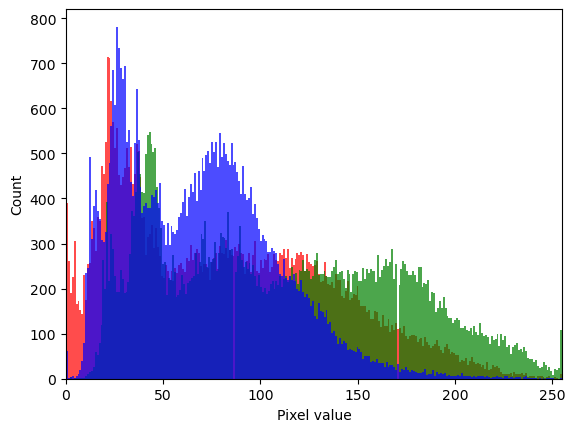

In [224]:
plt.hist(red_channel_for_histogram, bins = 256, color = "red", alpha = 0.7)
plt.hist(green_channel_for_histogram, bins = 256, color = "green", alpha = 0.7)
plt.hist(blue_channel_for_histogram, bins = 256, color = "blue", alpha = 0.7)

plt.xlabel("Pixel value")
plt.ylabel("Count")

plt.xlim(0, 255) # да започва хистограмата и завършва на тия ст-ти

plt.show()

In [226]:
cat_image2 = imread("/Users/miroslavamalkovska/Documents/AI/Data_Science/04/data/domestic-cat/dc (58).jpg")

In [230]:
cat_image2.shape

(183, 275, 3)

In [240]:
domestic_cats[57] # 57-то

array([[161, 160, 156],
       [164, 163, 159],
       [168, 167, 163],
       [171, 170, 166],
       [173, 172, 170],
       [172, 172, 170],
       [170, 170, 168],
       [169, 169, 169],
       [168, 169, 171],
       [174, 175, 177],
       [177, 178, 182],
       [172, 173, 177],
       [158, 162, 165],
       [147, 150, 155],
       [140, 143, 148],
       [138, 141, 146],
       [134, 135, 130],
       [129, 130, 124],
       [131, 132, 124],
       [144, 146, 135],
       [128, 130, 117],
       [143, 145, 131],
       [147, 150, 133],
       [143, 146, 129],
       [144, 147, 128],
       [150, 153, 134],
       [155, 158, 139],
       [155, 158, 141],
       [152, 154, 140],
       [152, 154, 140],
       [157, 159, 146],
       [163, 165, 152],
       [152, 152, 150],
       [151, 151, 149],
       [151, 151, 149],
       [150, 150, 150],
       [150, 148, 151],
       [150, 148, 153],
       [149, 147, 152],
       [149, 146, 153],
       [147, 144, 151],
       [148, 146

In [246]:
(domestic_cats[57] == cat_image2).all()

False

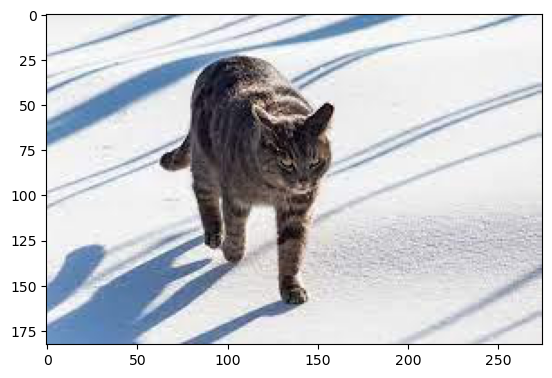

In [248]:
plt.imshow(cat_image2)

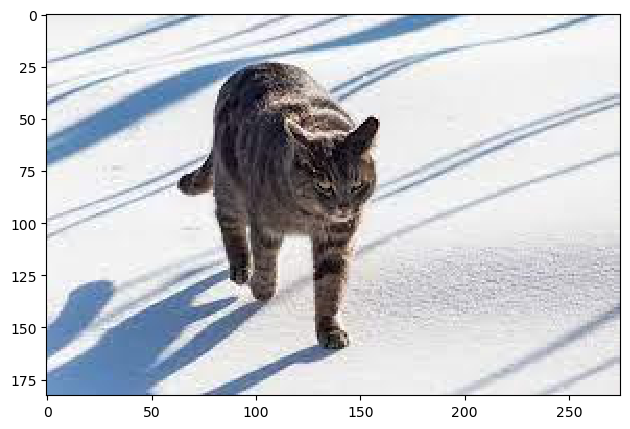

In [250]:
imshow(cat_image2)

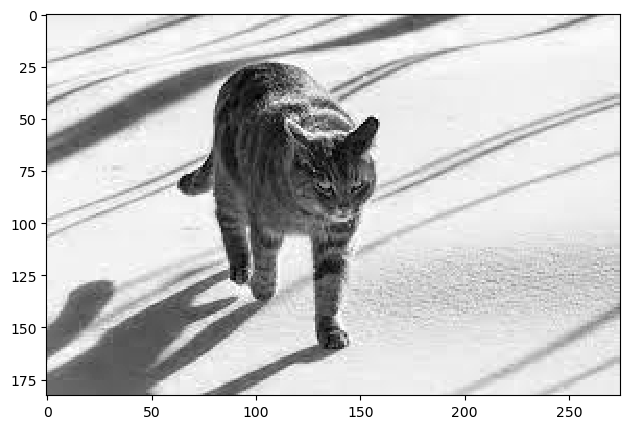

In [254]:
imshow(cat_image2[:, :, 0]) # червен канал

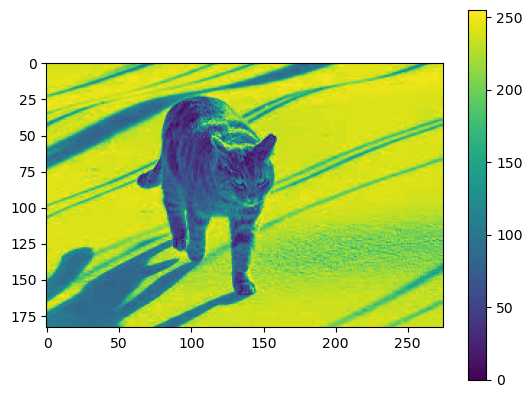

In [256]:
plt.imshow(cat_image2[:, :, 0]) # очаква heatmap (хистограма)
plt.colorbar()

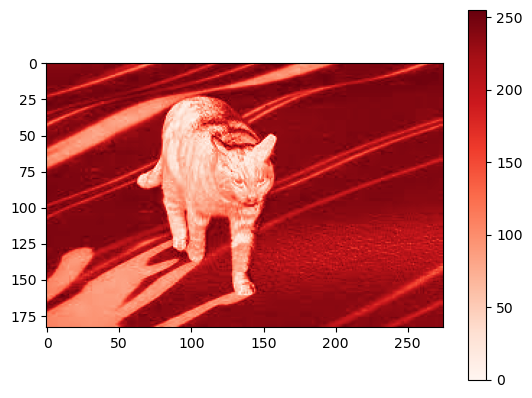

In [258]:
plt.imshow(cat_image2[:, :, 0], cmap = "Reds")
plt.colorbar()

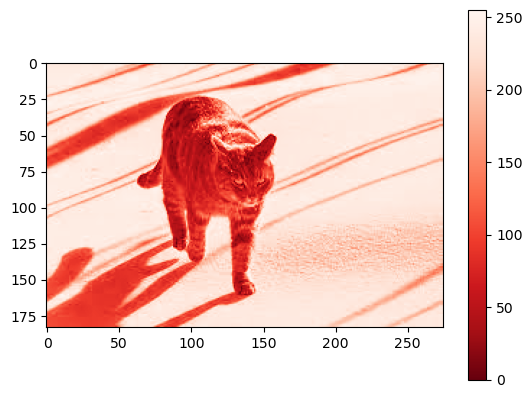

In [260]:
plt.imshow(cat_image2[:, :, 0], cmap = "Reds_r") # reds reversed
plt.colorbar()
plt.show()

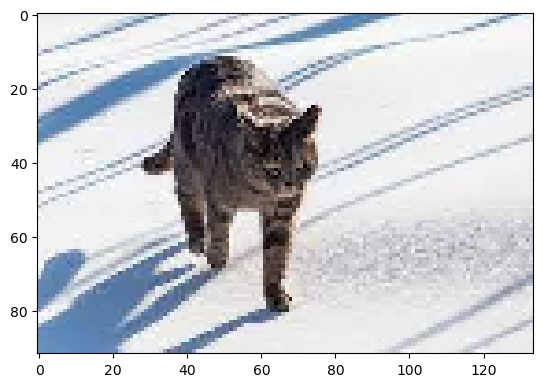

In [268]:
plt.imshow(cat_image2[::2, 7::2]) # за всички 4 пъти по-малко изображение

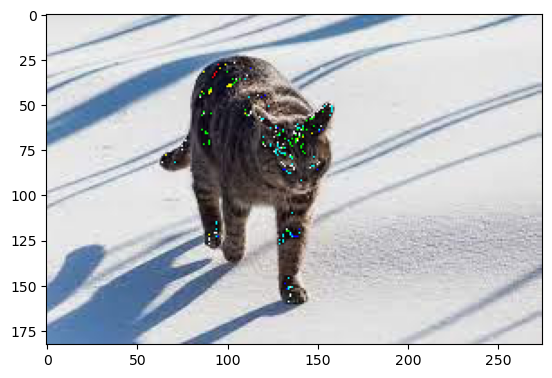

In [282]:
plt.imshow((cat_image2 + 500).astype("uint8"))

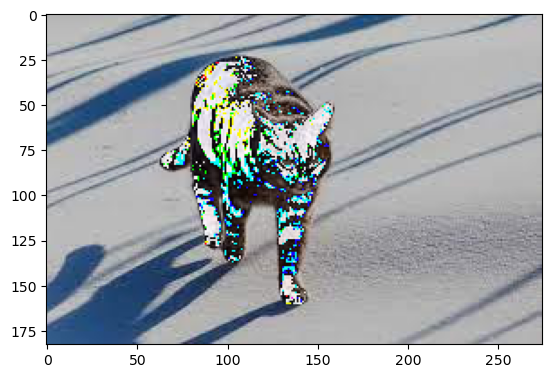

In [284]:
plt.imshow((cat_image2 + 200).astype("uint8"))

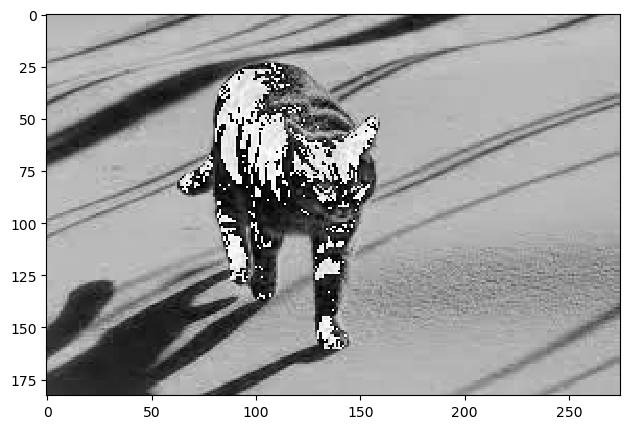

In [286]:
imshow((cat_image2[:, :, 0] + 200).astype("uint8"))

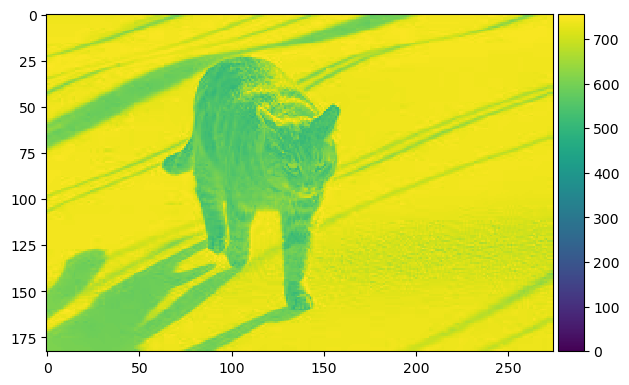

In [294]:
imshow(cat_image2[:, :, 0] + 500, vmin = 0, vmax = 500+256)

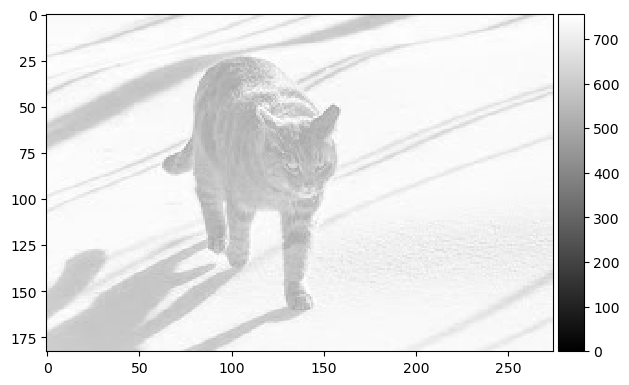

In [296]:
imshow(cat_image2[:, :, 0] + 500, vmin = 0, vmax = 500+256, cmap = "gray")

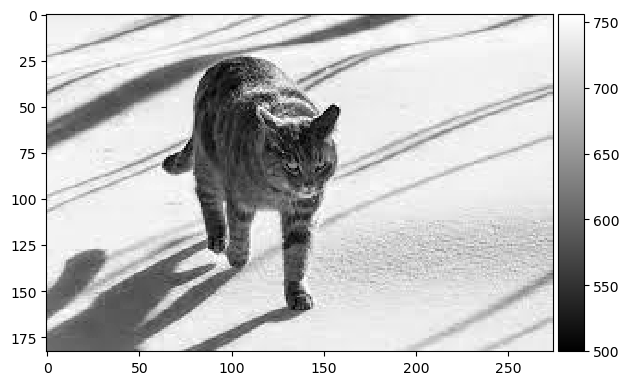

In [300]:
imshow(cat_image2[:, :, 0] + 500, vmin = 500, vmax = 500+256, cmap = "gray")

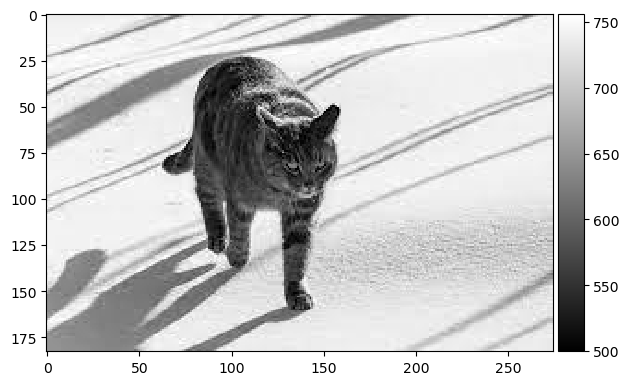

In [302]:
imshow(cat_image2[:, :, 1] + 500, vmin = 500, vmax = 500+256, cmap = "gray") # 1 - зелен канал, 0-червен

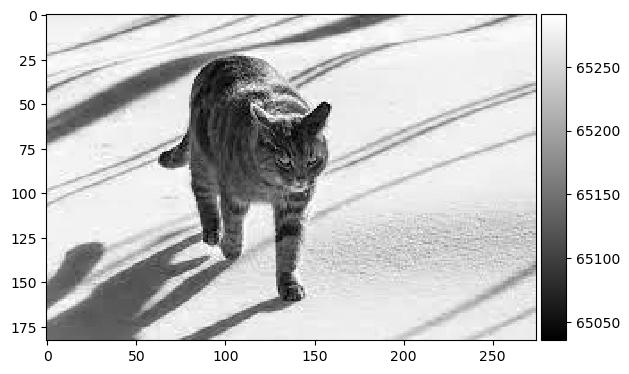

In [304]:
imshow(cat_image2[:, :, 0] - 500, cmap = "gray")

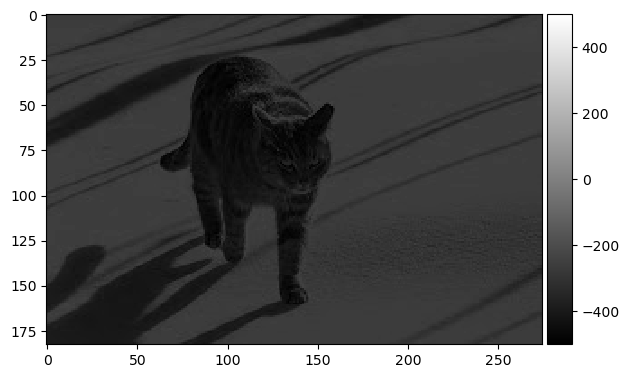

In [306]:
imshow(cat_image2[:, :, 0].astype(int) - 500, cmap = "gray")

In [322]:
red_channel_for_histogram2 = cat_image2[:, :, 0].ravel()
green_channel_for_histogram2 = cat_image2[:, :, 1].ravel()
blue_channel_for_histogram2 = cat_image2[:, :, 2].ravel()

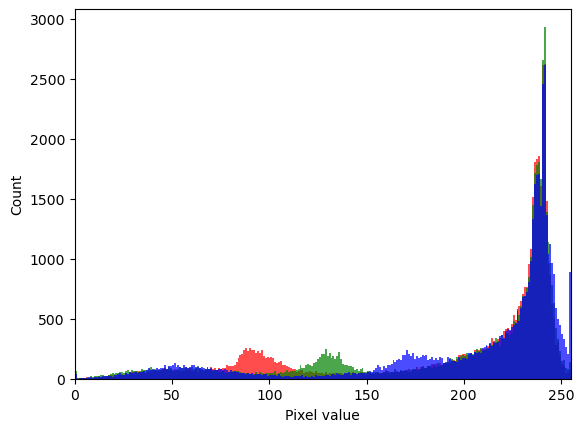

In [326]:
plt.hist(red_channel_for_histogram2, bins = 256, color = "red", alpha = 0.7)
plt.hist(green_channel_for_histogram2, bins = 256, color = "green", alpha = 0.7)
plt.hist(blue_channel_for_histogram2, bins = 256, color = "blue", alpha = 0.7)

plt.xlabel("Pixel value")
plt.ylabel("Count")

plt.xlim(0, 255) # да започва хистограмата и завършва на тия ст-ти

plt.show()

In [332]:
cat_image.mean(axis = 0) # mean по редове

array([[ 66.02185792, 101.07650273,  60.72131148],
       [ 66.2568306 , 101.36065574,  60.97814208],
       [ 67.40437158, 102.3989071 ,  61.8852459 ],
       [ 68.50819672, 103.52459016,  62.89071038],
       [ 68.4863388 , 103.54644809,  62.75409836],
       [ 69.63387978, 104.57923497,  63.67213115],
       [ 69.12568306, 104.1420765 ,  62.86338798],
       [ 69.12021858, 104.32786885,  62.66666667],
       [ 69.49726776, 104.62295082,  62.96174863],
       [ 70.6557377 , 105.86885246,  64.01092896],
       [ 70.82513661, 106.21311475,  64.31147541],
       [ 72.72131148, 107.98360656,  66.01092896],
       [ 71.79234973, 107.27868852,  65.18032787],
       [ 69.84153005, 105.40983607,  63.18032787],
       [ 69.27322404, 104.97814208,  62.75956284],
       [ 70.95081967, 106.53551913,  64.36065574],
       [ 73.6557377 , 110.1420765 ,  66.61202186],
       [ 71.19672131, 107.70491803,  63.93989071],
       [ 70.59016393, 107.16939891,  62.74863388],
       [ 71.60655738, 108.18032

In [334]:
cat_image.mean(axis = 0).shape # за вс колона и за вс канал по 1 ст-ст

(275, 3)

In [336]:
cat_image.mean(axis = 1).shape # за вс ред и за вс канал

(183, 3)

In [338]:
cat_image.mean(axis = 2).shape # по канали

(183, 275)

In [340]:
cat_image.mean(axis = 2)

array([[ 80.66666667,  75.66666667,  67.66666667, ...,  35.66666667,
         35.66666667,  35.66666667],
       [ 74.66666667,  71.66666667,  65.66666667, ...,  35.66666667,
         35.66666667,  35.66666667],
       [ 66.66666667,  65.66666667,  62.66666667, ...,  33.66666667,
         33.66666667,  33.66666667],
       ...,
       [117.        , 116.66666667, 122.        , ..., 150.        ,
        164.        , 176.        ],
       [130.        , 124.66666667, 123.        , ..., 156.66666667,
        170.66666667, 183.66666667],
       [138.        , 131.66666667, 127.        , ..., 160.66666667,
        174.66666667, 186.66666667]])

In [342]:
cat_image.mean(axis = 2).dtype

dtype('float64')

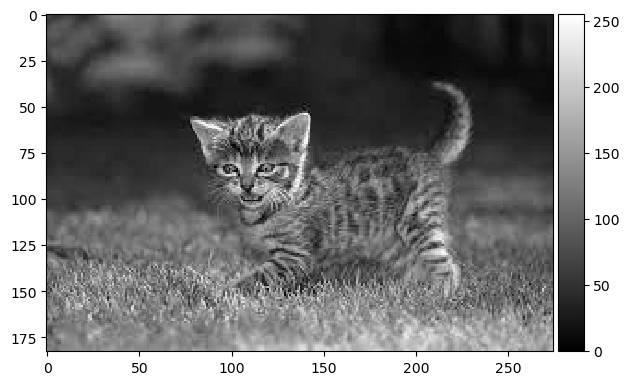

In [358]:
imshow(cat_image.mean(axis = 2), cmap = "gray", vmin = 0, vmax = 255) 
# границите - кое е най-светлото и най-тъмното в едно изображение

In [352]:
red = cat_image[:, :, 0]
green = cat_image[:, :, 1]
blue = cat_image[:, :, 2]

# (red, green, blue) = cat_image[:, :, ]
# -> да се направи на 1 ред, 1 символ тр да се намери, който да направи разпределение в 3 канала

cat_image_gray = 0.299 * red + 0.587 * green + 0.114 * blue

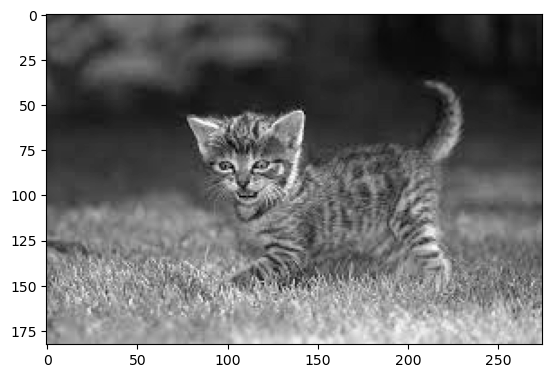

In [360]:
plt.imshow(cat_image_gray, cmap = "gray", vmin = 0, vmax = 255)

In [362]:
cat_image_masked = cat_image.copy()

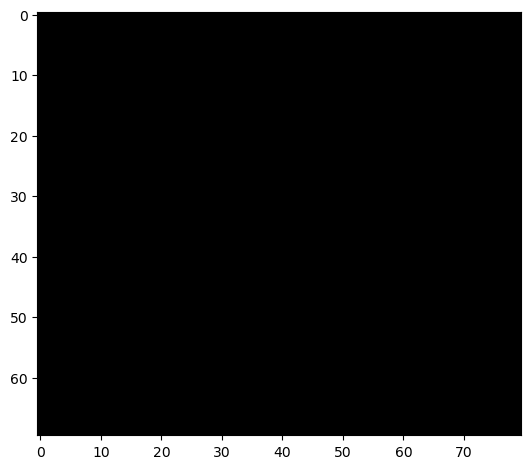

In [370]:
imshow(cat_image_masked[50:120, 70:150])

In [368]:
cat_image_masked[50:120, 70:150] = 0

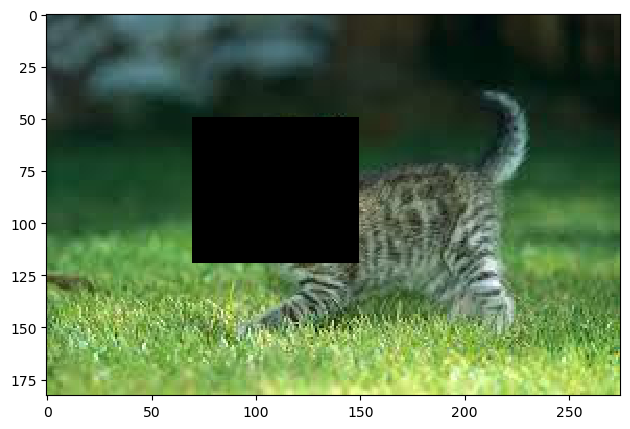

In [372]:
imshow(cat_image_masked)

In [400]:
(cat_image / 256).dtype

dtype('float64')

In [404]:
cat_image_normalized = (cat_image / 255.0) # така най-често се използват - с нормализации

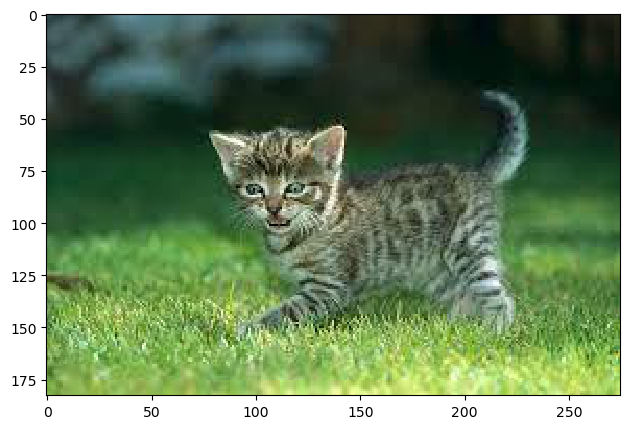

In [382]:
imshow(cat_image_normalized)

In [384]:
cat_image_normalized

array([[[0.25      , 0.34375   , 0.3515625 ],
        [0.23046875, 0.32421875, 0.33203125],
        [0.19921875, 0.29296875, 0.30078125],
        ...,
        [0.15234375, 0.16015625, 0.10546875],
        [0.15234375, 0.16015625, 0.10546875],
        [0.15234375, 0.16015625, 0.10546875]],

       [[0.2265625 , 0.3203125 , 0.328125  ],
        [0.21484375, 0.30859375, 0.31640625],
        [0.19140625, 0.28515625, 0.29296875],
        ...,
        [0.15234375, 0.16015625, 0.10546875],
        [0.15234375, 0.16015625, 0.10546875],
        [0.15234375, 0.16015625, 0.10546875]],

       [[0.1953125 , 0.2890625 , 0.296875  ],
        [0.19140625, 0.28515625, 0.29296875],
        [0.1796875 , 0.2734375 , 0.28125   ],
        ...,
        [0.14453125, 0.15234375, 0.09765625],
        [0.14453125, 0.15234375, 0.09765625],
        [0.14453125, 0.15234375, 0.09765625]],

       ...,

       [[0.4609375 , 0.66015625, 0.25      ],
        [0.45703125, 0.65625   , 0.25390625],
        [0.484375  , 0

In [386]:
# пренареждане на канали
np.array([blue, green, red])

array([[[ 90,  85,  77, ...,  27,  27,  27],
        [ 84,  81,  75, ...,  27,  27,  27],
        [ 76,  75,  72, ...,  25,  25,  25],
        ...,
        [ 64,  65,  70, ...,  85,  99, 111],
        [ 77,  73,  71, ...,  91, 105, 118],
        [ 85,  80,  75, ...,  95, 109, 121]],

       [[ 88,  83,  75, ...,  41,  41,  41],
        [ 82,  79,  73, ...,  41,  41,  41],
        [ 74,  73,  70, ...,  39,  39,  39],
        ...,
        [169, 168, 172, ..., 201, 215, 227],
        [182, 176, 173, ..., 207, 221, 234],
        [190, 183, 177, ..., 210, 224, 236]],

       [[ 64,  59,  51, ...,  39,  39,  39],
        [ 58,  55,  49, ...,  39,  39,  39],
        [ 50,  49,  46, ...,  37,  37,  37],
        ...,
        [118, 117, 124, ..., 164, 178, 190],
        [131, 125, 125, ..., 172, 186, 199],
        [139, 132, 129, ..., 177, 191, 203]]], dtype=uint8)

In [388]:
red_channel_for_histogram_normalized = cat_image_normalized[:, :, 0].ravel()
green_channel_for_histogram_normalized = cat_image_normalized[:, :, 1].ravel()
blue_channel_for_histogram_normalized = cat_image_normalized[:, :, 2].ravel()

In [394]:
red_channel_for_histogram_normalized.min(), red_channel_for_histogram_normalized.max()

(0.0, 0.99609375)

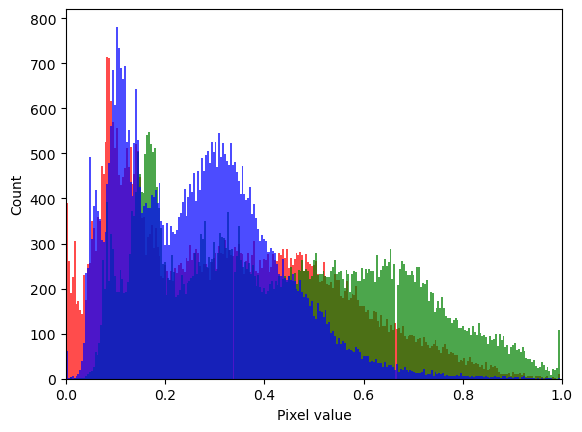

In [396]:
plt.hist(red_channel_for_histogram_normalized, bins = 256, color = "red", alpha = 0.7)
plt.hist(green_channel_for_histogram_normalized, bins = 256, color = "green", alpha = 0.7)
plt.hist(blue_channel_for_histogram_normalized, bins = 256, color = "blue", alpha = 0.7)

plt.xlabel("Pixel value")
plt.ylabel("Count")

plt.xlim(0, 1)

plt.show()

In [402]:
def min_max_normalization(x, min = 0, max = 1):
    return (x - min) / (np.max(x) - np.min(x))

In [408]:
conv_filter = np.array([
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 1]
])

In [430]:
conv_filter2 = np.eye(5) # единична матрица

In [432]:
conv_filter2

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [458]:
conv_filter3 = np.eye(5, 5, 2) # единична матрица с диагонал на 2-рия ред

In [460]:
conv_filter3

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [476]:
conv_filter4 = [
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]
]

In [478]:
result4 = convolve2d(cat_image[:, :, 0], conv_filter4, mode = "same")

In [462]:
result3 = convolve2d(cat_image[:, :, 0], conv_filter3, mode = "same")

In [434]:
result2 = convolve2d(cat_image[:, :, 0], conv_filter2, mode = "same")

In [414]:
result = convolve2d(cat_image[:, :, 0], conv_filter, mode = "same")

In [416]:
result.min(), result.max()

(0, 1202)

/opt/anaconda3/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


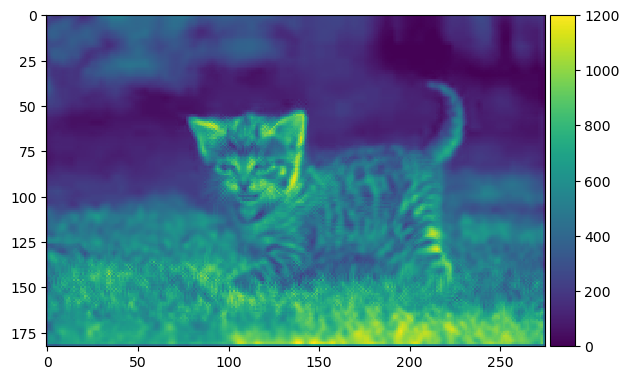

In [418]:
imshow(result)

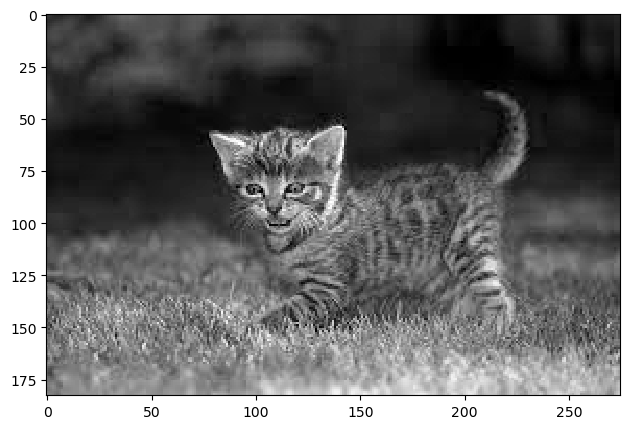

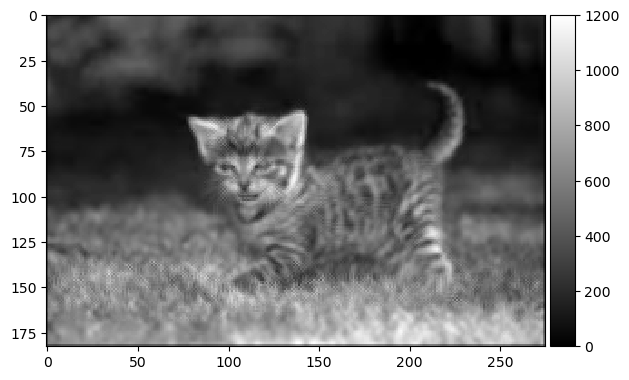

In [438]:
imshow(cat_image[:, :, 0], cmap = "gray")
plt.show()
imshow(result, cmap = "gray")

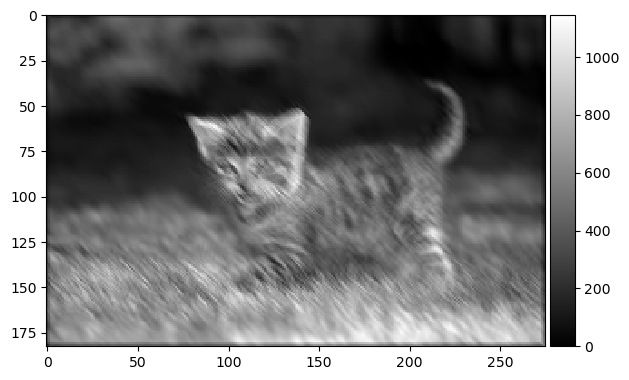

In [440]:
imshow(result2, cmap = "gray")

/opt/anaconda3/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


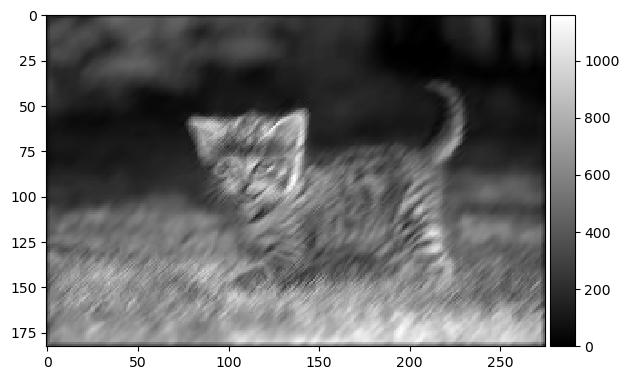

In [480]:
imshow(result4, cmap = "gray")

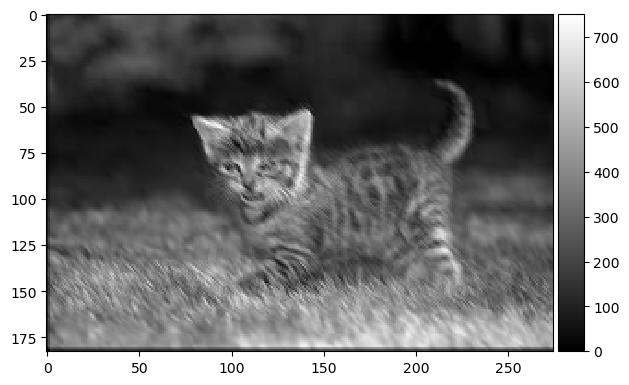

In [464]:
imshow(result3, cmap = "gray")

In [526]:
cat_image_binary = cat_image.copy()

In [528]:
cat_image.mean()

86.89094883258818

In [530]:
cat_image_binary[cat_image_binary <= 50] = 0
cat_image_binary[cat_image_binary >= 205] = 255

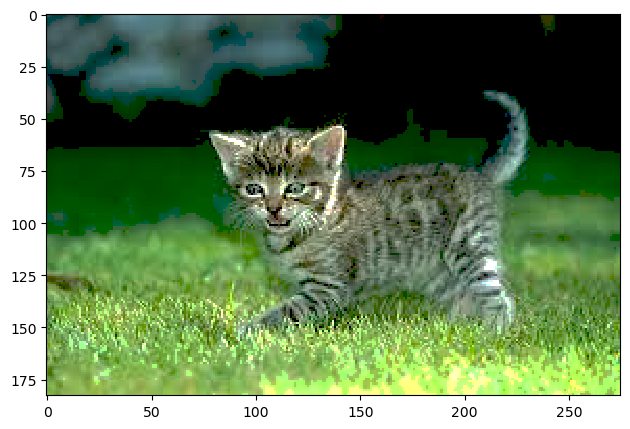

In [532]:
imshow(cat_image_binary, cmap = "gray")
plt.show()

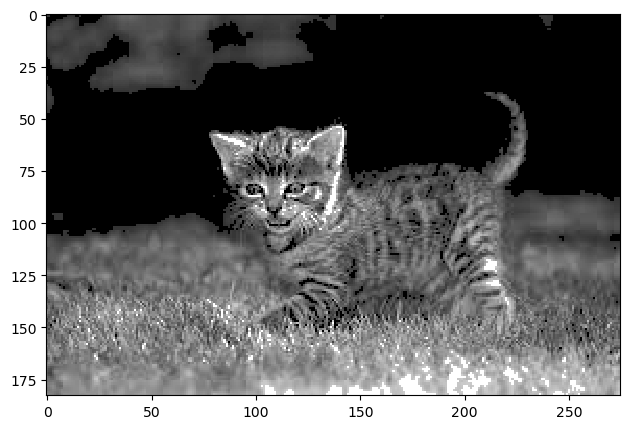

In [534]:
imshow(cat_image_binary[:, :, 0], cmap = "gray") # само 1-ния канал
plt.show()

In [544]:
threshold_otsu(cat_image[:, :, 0]) # кое е оптималното

88

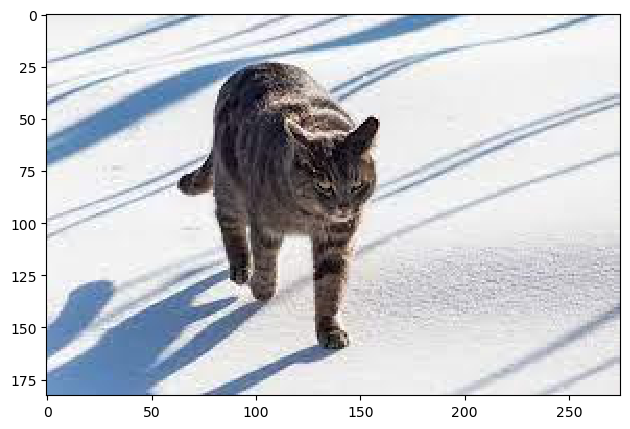

In [546]:
imshow(cat_image2)

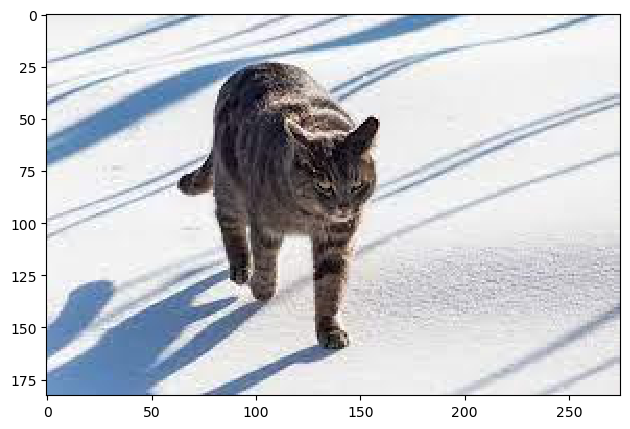

In [568]:
imshow(domestic_cats[57])

In [574]:
threshold_otsu(domestic_cats[57][:, :, 0])

156

In [588]:
cat_image_56_binary = domestic_cats[57].copy()[:, :, 0]

In [590]:
cat_image_56_binary[cat_image_56_binary <= 156] = 0
cat_image_56_binary[cat_image_56_binary > 156] = 255

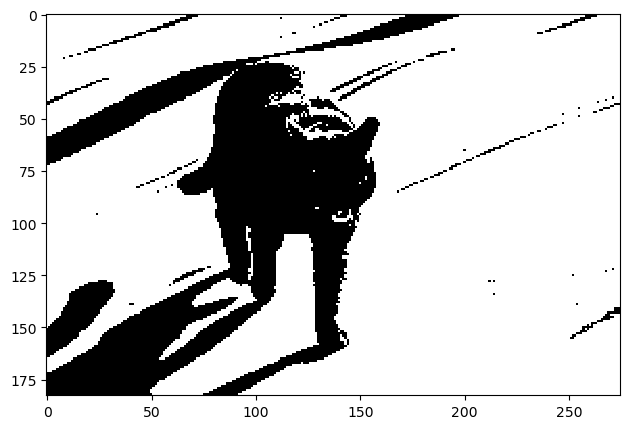

In [592]:
imshow(cat_image_56_binary)

/opt/anaconda3/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


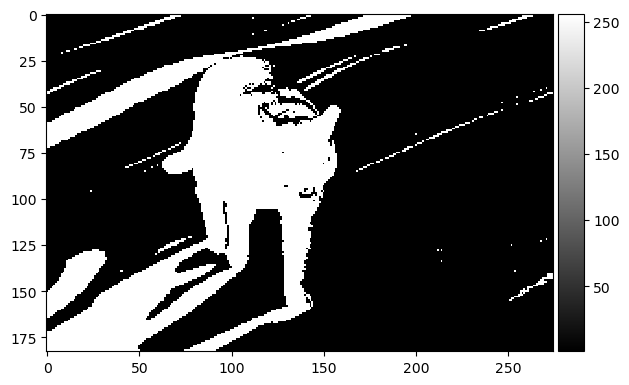

In [594]:
imshow(256 - cat_image_56_binary, cmap = "gray")

In [614]:
result5 = 0.5 * domestic_cats[0].astype(int) + 0.5 * domestic_cats[1].astype(int)

In [616]:
result5.min(), result5.max()

(4.5, 249.5)

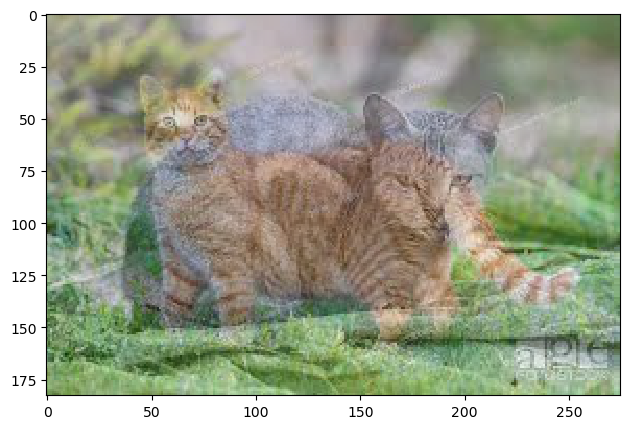

In [620]:
imshow(result5.astype("uint8"))

/opt/anaconda3/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


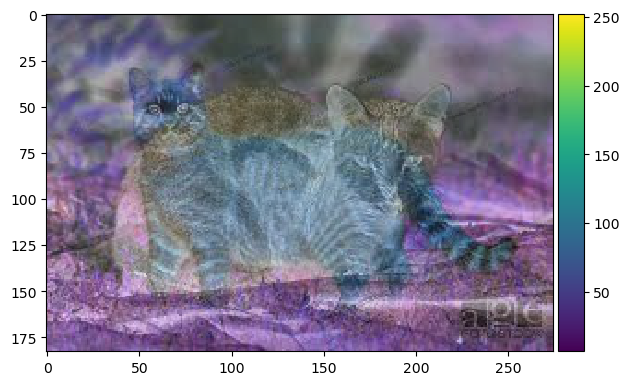

In [622]:
imshow(256 - result5.astype("uint8"))

In [642]:
resize(cat_image, (500, 500)).shape

(500, 500, 3)

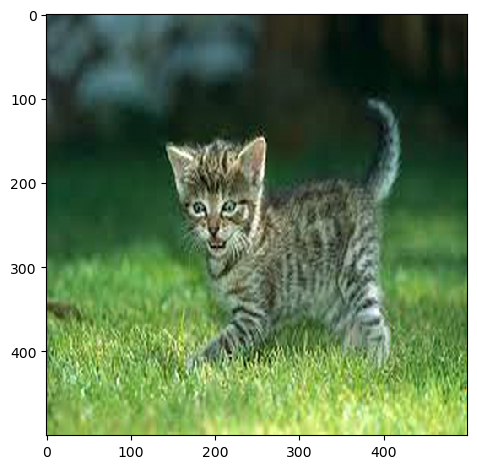

In [644]:
imshow(resize(cat_image, (500, 500), order = 3)) # order - да е по-качествено

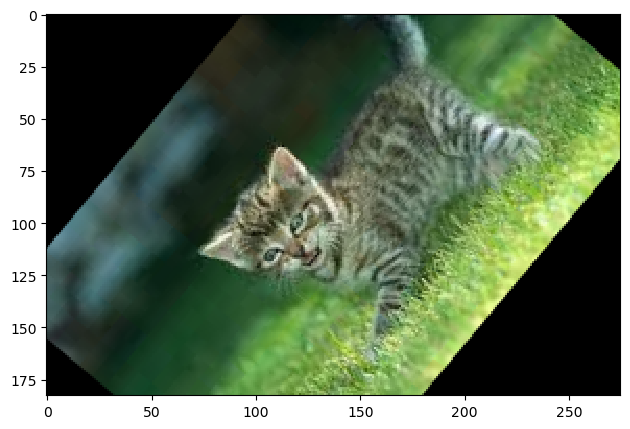

In [638]:
imshow(rotate(cat_image, 50))

In [652]:
fft2(cat_image).shape

(183, 275, 3)

In [666]:
fft_amplitudes = np.abs(fftshift(fft2(cat_image[:, :, 0]))) # np.abs - връща модула

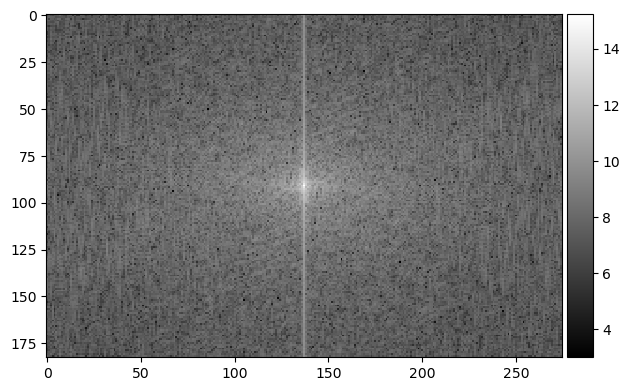

In [674]:
imshow(np.log(fft_amplitudes), cmap = "gray")
# логаритъм от фазите, така че мн тъмните да изсветлеят

In [658]:
np.abs(-5)

5

In [662]:
np.abs(2j) # тук получаваме амплитудата

2.0

In [680]:
fft_amplitudes_cats = np.abs(fftshift(fft2(domestic_cats[57][:, :, 0])))

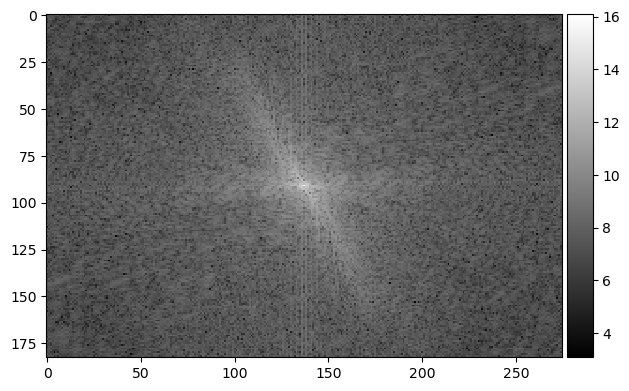

In [682]:
imshow(np.log(fft_amplitudes_cats), cmap = "gray")